Dans ce programme on va calculer le **tableau des événements** passant par un tableau intermediare en demarrant de tableau des arrivées et durées de service **générer aléatoirement**, On va  utiliser les bibliothéque Pandas (dataframes) numpy (random) et matplotlib pour la visialisation

In [16]:
#importer les librairies
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

In [8]:


# Choisir le seed 
np.random.seed(10)

# Générer 10 valeurs uniques aléatoires entre 1 et 40 pour la colonne "Date_Arrivée" et les ordonner 
valeurs_ordonnees = np.sort(np.random.choice(np.arange(1, 41), size=10, replace=False))

# Créer un DataFrame avec une colonne "Date_Arrivée"
df = pd.DataFrame({"Date_Arrivée": valeurs_ordonnees})

# Ajouter une colonne "Durée_Service" avec des valeurs aléatoires float entre 1 et 4
df["Durée_Service"] = np.round(np.random.uniform(1, 5, 10),1)
# Ajouter une colonne "N_Client" avec des valeurs de 1 à 10
df.insert(0, "N_Client", np.arange(1, 11))

# Afficher le DataFrame
df



,N_Client,Date_Arrivée,Durée_Service
0,1,3,1.3
1,2,8,1.2
2,3,13,4.1
3,4,14,1.0
4,5,15,3.4
5,6,25,2.3
6,7,28,3.2
7,8,31,2.3
8,9,32,2.6
9,10,36,1.3


In [9]:
# Calculer la colonne "Date_D_Service" et "Date_F_Service" pour le premier client 
df.at[0, "Date_D_Service"] = df.at[0, "Date_Arrivée"]
df.at[0, "Date_F_Service"] = df.at[0, "Date_D_Service"]+df.at[0, "Durée_Service"]

df

,N_Client,Date_Arrivée,Durée_Service,Date_D_Service,Date_F_Service
0,1,3,1.3,3.0,4.3
1,2,8,1.2,NaN,NaN
2,3,13,4.1,NaN,NaN
3,4,14,1.0,NaN,NaN
4,5,15,3.4,NaN,NaN
5,6,25,2.3,NaN,NaN
6,7,28,3.2,NaN,NaN
7,8,31,2.3,NaN,NaN
8,9,32,2.6,NaN,NaN
9,10,36,1.3,NaN,NaN


In [10]:
# Calculer la colonne "Date_D_Service" et "Date_F_Service" des autres clients
for i in range(1, 10):
      df['Date_D_Service'][i] = max( df['Date_F_Service'][i-1] , df['Date_Arrivée'][i])
      df['Date_F_Service'][i] = df['Date_D_Service'][i]  + df ['Durée_Service'][i]
df

,N_Client,Date_Arrivée,Durée_Service,Date_D_Service,Date_F_Service
0,1,3,1.3,3.0,4.3
1,2,8,1.2,8.0,9.2
2,3,13,4.1,13.0,17.1
3,4,14,1.0,17.1,18.1
4,5,15,3.4,18.1,21.5
5,6,25,2.3,25.0,27.3
6,7,28,3.2,28.0,31.2
7,8,31,2.3,31.2,33.5
8,9,32,2.6,33.5,36.1
9,10,36,1.3,36.1,37.4


In [ ]:
df['Temps_Attente'] = df['Date_D_Service'] - df['Date_Arrivée']
df['Temps_System'] =df['Date_F_Service']-  df['Date_Arrivée']
df

,N_Client,Date_Arrivée,Durée_Service,Date_D_Service,Date_F_Service,Temps_Attente,Temps_System
0,1,3,1.3,3.0,4.3,0.0,1.3
1,2,8,1.2,8.0,9.2,0.0,1.2
2,3,13,4.1,13.0,17.1,0.0,4.1
3,4,14,1.0,17.1,18.1,3.1,4.1
4,5,15,3.4,18.1,21.5,3.1,6.5
5,6,25,2.3,25.0,27.3,0.0,2.3
6,7,28,3.2,28.0,31.2,0.0,3.2
7,8,31,2.3,31.2,33.5,0.2,2.5
8,9,32,2.6,33.5,36.1,1.5,4.1
9,10,36,1.3,36.1,37.4,0.1,1.4


In [11]:

# Créer un DataFrame des arrivées
df_Arrivée=pd.DataFrame(columns=['Date_Evenement','Numero_Client','Type_Evenement','nb_file','nb_system','etat_serveur'])

for i in range(1, 10):
      df_Arrivée['Date_Evenement'] = df["Date_Arrivée"]
      df_Arrivée['Numero_Client'] = df['N_Client']
      df_Arrivée["Type_Evenement"]="Arrivée"

# Créer un  DataFrame  des départs
df_Départ=pd.DataFrame(columns=['Date_Evenement','Numero_Client','Type_Evenement','nb_file','nb_system','etat_serveur'])

for i in range(1, 10):
      df_Départ['Date_Evenement'] = df["Date_F_Service"]
      df_Départ['Numero_Client'] = df['N_Client']
      df_Départ["Type_Evenement"]="Départ"
   
# Concaténer les deux et ordonner le nouveau df par "Date_Evenement" 

df_Evenement = pd.concat([df_Arrivée, df_Départ], ignore_index=True)
df_Evenement = df_Evenement.sort_values(by='Date_Evenement')
df_Evenement.reset_index(inplace=True,drop=True)
df_Evenement

,Date_Evenement,Numero_Client,Type_Evenement,nb_file,nb_system,etat_serveur
0,3.0,1,Arrivée,NaN,NaN,NaN
1,4.3,1,Départ,NaN,NaN,NaN
2,8.0,2,Arrivée,NaN,NaN,NaN
3,9.2,2,Départ,NaN,NaN,NaN
4,13.0,3,Arrivée,NaN,NaN,NaN
5,14.0,4,Arrivée,NaN,NaN,NaN
6,15.0,5,Arrivée,NaN,NaN,NaN
7,17.1,3,Départ,NaN,NaN,NaN
8,18.1,4,Départ,NaN,NaN,NaN
9,21.5,5,Départ,NaN,NaN,NaN


In [12]:
df_Evenement[ "nb_file"] = 0
df_Evenement[ "nb_system"] = 1
df_Evenement[ "etat_serveur"] = 'Occupé'

for i, row in df_Evenement.iterrows():
    if i>0: # le premier est déjà initialisé
        
    # -----------------Traiter les cas d'arrivée ----------------------
        if(row['Type_Evenement']=='Arrivée'):   
            df_Evenement['nb_system'][i] = df_Evenement['nb_system'][i-1] + 1  #On incrémente le nb des clients dans le systeme
            df_Evenement['etat_serveur'][i] = 'Occupé'  #On  marque le serveur comme occupé
            if (df_Evenement['nb_system'][i-1] > 0 ):  #s'il ya déjà des client dans le system le client sera ajouter a la file d'attente
                df_Evenement['nb_file'][i] = df_Evenement['nb_file'][i-1] + 1  
           
    # ---------------Traiter es cas de depart  --------------------------          
        elif (row['Type_Evenement']=='Départ'):   
            df_Evenement['nb_system'][i] = df_Evenement['nb_system'][i-1] - 1  #On décrémente le nb des clients dans le systeme
            if (df_Evenement['nb_system'][i-1]  > 1 ):
                df_Evenement['nb_file'][i] = df_Evenement['nb_file'][i-1] -1 #s'il ya déjà des client dans le system le client était dans a la file d'attente
            else:
                if df_Evenement['nb_system'][i-1] == 1 :
                    df_Evenement['etat_serveur'][i] = 'Libre' #s'il avait un seul client dans le systeme le serveur devient Libre 
                
df_Evenement

,Date_Evenement,Numero_Client,Type_Evenement,nb_file,nb_system,etat_serveur
0,3.0,1,Arrivée,0,1,Occupé
1,4.3,1,Départ,0,0,Libre
2,8.0,2,Arrivée,0,1,Occupé
3,9.2,2,Départ,0,0,Libre
4,13.0,3,Arrivée,0,1,Occupé
5,14.0,4,Arrivée,1,2,Occupé
6,15.0,5,Arrivée,2,3,Occupé
7,17.1,3,Départ,1,2,Occupé
8,18.1,4,Départ,0,1,Occupé
9,21.5,5,Départ,0,0,Libre


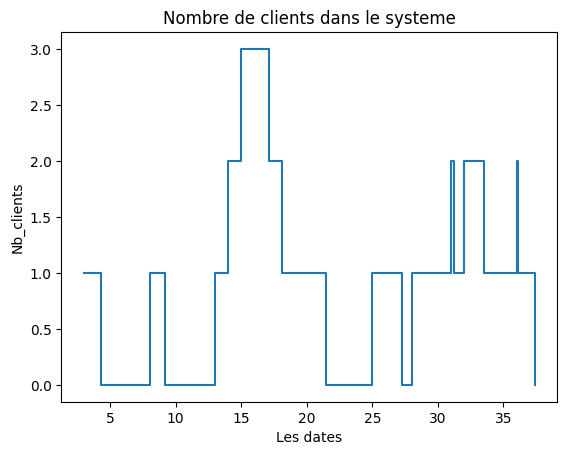

In [14]:
from matplotlib import pyplot as plt
y= df_Evenement['nb_system']
x= df_Evenement['Date_Evenement']
plt.xlabel('Les dates')
plt.ylabel('Nb_clients')
plt.title('Nombre de clients dans le systeme')
plt.step(x,y,where='post')


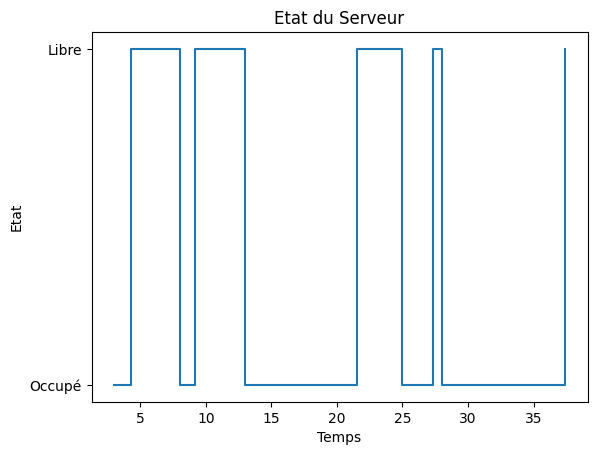

In [15]:
y= df_Evenement['etat_serveur']
x= df_Evenement['Date_Evenement']
plt.xlabel('Temps')
plt.ylabel('Etat')
plt.title('Etat du Serveur')
plt.step(x,y,where='post')